We want to have a look at our data sets.
The data sets are from three files:  Two CSV files named 'tn.movie_budgets.csv.gz', and 'bom.movie_gross.csv.gz' and a sqlite database named 'im.db'
Parsing through the contents of thae data sets will help gain a a better understandig of the contets of the data.
Lets go!

In [1]:
#To open the csv file  in this Notebook we need to use pandas built in functions.
#We import pandas then read the data as below.

import pandas as pd

movie_budgets=pd.read_csv('tn.movie_budgets.csv.gz')
print(movie_budgets)


      id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1         $410,600,000   $241,063,8

In [2]:
#checking on the type of 'movie_budget' data
type(movie_budgets)

pandas.core.frame.DataFrame

In [3]:
#The first 10 elements of the data 
movie_budgets.head(10)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [4]:
# check the data type in each column of the data in movie_budget.
# loop over the columns
#use a function 
def column_data_type(movie_budgets):
    for column_name in movie_budgets.columns:
        data_type = movie_budgets[column_name].dtype
        print(f"Column '{column_name}' has data type: {data_type}")
column_data_type(movie_budgets)


Column 'id' has data type: int64
Column 'release_date' has data type: object
Column 'movie' has data type: object
Column 'production_budget' has data type: object
Column 'domestic_gross' has data type: object
Column 'worldwide_gross' has data type: object


The above data set named movie_budgets is a dataframe cointaining  5782 rows and 6 columns.The columns include id,release_date,movie,production_budget,domestic_gross and worldwide_gross.


In [5]:
#Understanding our data.
#checking for missing values in each columns.

movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

dataframe has no missing values.

Summary statistics of the data.

In [6]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)

movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)


movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].astype(int)
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype(int)

In [7]:
movie_budgets.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [8]:
summary1 = movie_budgets['production_budget'].describe()
summary2 = movie_budgets['domestic_gross'].describe()
summary3 = movie_budgets['worldwide_gross'].describe()
 
print(summary1, summary2, summary3)

count    5.782000e+03
mean     3.158776e+07
std      4.181208e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64 count    5.782000e+03
mean     4.187333e+07
std      6.824060e+07
min      0.000000e+00
25%      1.429534e+06
50%      1.722594e+07
75%      5.234866e+07
max      9.366622e+08
Name: domestic_gross, dtype: float64 count     5782
unique    5356
top         $0
freq       367
Name: worldwide_gross, dtype: object


In [9]:
movie_budgets_no_duplicates = movie_budgets.drop_duplicates()

# Displaying the DataFrame without duplicates
print(movie_budgets_no_duplicates)

      id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

      production_budget  domestic_gross worldwide_gross  
0             425000000       760507625  $2,776,345,279  
1             410600000       2

In [10]:
duplicates = movie_budgets[movie_budgets.duplicated()]

if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:")
    print(duplicates)

No duplicates found.


In [11]:
def column_data_type(movie_budgets):
    for column_name in movie_budgets.columns:
        data_type = movie_budgets[column_name].dtype
        print(f"Column '{column_name}' has data type: {data_type}")
column_data_type(movie_budgets)


Column 'id' has data type: int64
Column 'release_date' has data type: object
Column 'movie' has data type: object
Column 'production_budget' has data type: int32
Column 'domestic_gross' has data type: int32
Column 'worldwide_gross' has data type: object


In [12]:
import pandas as pd

# Assuming df is your DataFrame containing the data
# Replace 'df' with the name of your DataFrame if it's different

# Create a copy of the DataFrame before removing duplicates
movie_budgets_original = movie_budgets.copy()

# Removing duplicates
movie_budgets_no_duplicates = movie_budgets.drop_duplicates()

# Store the indices of removed duplicates
removed_indices = movie_budgets.index.difference(movie_budgets_no_duplicates.index)

# Restore duplicates
if not removed_indices.empty:
    movie_budgets_restored = pd.concat([movie_budgets_original, movie_budget.loc[removed_indices]])
else:
    movie_budgets_restored = movie_budgets_original

# Display the DataFrame with restored duplicates
print(movie_budgets_restored)

      id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

      production_budget  domestic_gross worldwide_gross  
0             425000000       760507625  $2,776,345,279  
1             410600000       2

In [13]:
duplicates = movie_budgets_restored[movie_budgets_restored.duplicated()]

if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:")
    print(duplicates)

No duplicates found.


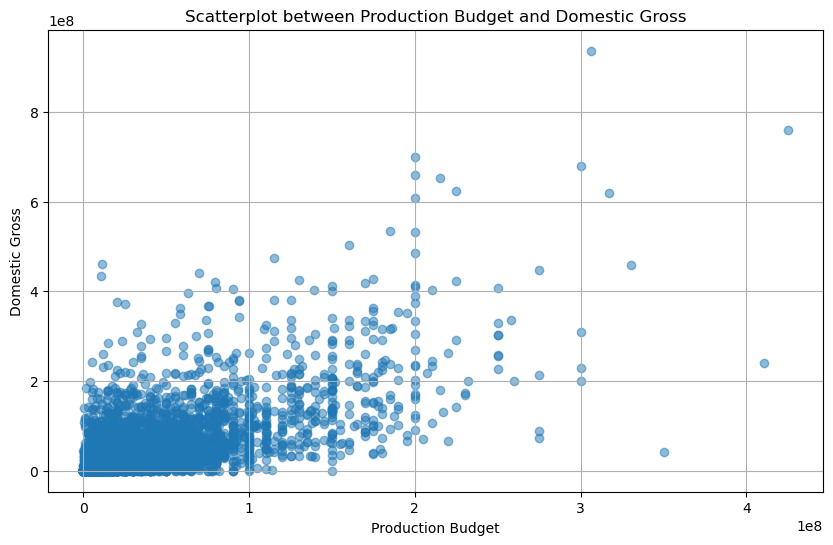

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Replace 'df' with the name of your DataFrame if it's different

# Plotting scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(movie_budgets['production_budget'], movie_budgets['domestic_gross'], alpha=0.5)
plt.title('Scatterplot between Production Budget and Domestic Gross')
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')
plt.grid(True)
plt.show()

In [15]:
#checking for correlation and covarience
import pandas as pd

# Checking for correlation
column_1='production_budget'
column_2= 'domestic_gross'
correlation = movie_budgets[['production_budget','domestic_gross' ]].corr()
print(correlation)

column_1='production_budget'
column_2= 'domestic_gross'
covarience = movie_budgets[['production_budget','domestic_gross' ]].cov()
print(covarience)



                   production_budget  domestic_gross
production_budget           1.000000        0.685682
domestic_gross              0.685682        1.000000
                   production_budget  domestic_gross
production_budget       1.748250e+15    1.956443e+15
domestic_gross          1.956443e+15    4.656779e+15


In [16]:
import pandas as pd
df = pd.read_csv('bom.movie_gross.csv.gz')
print (df)

                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [18]:
df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [19]:
df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [20]:
df.tail(10)

,title,studio,domestic_gross,foreign_gross,year
3377,Let Yourself Go,Men.,12200.0,NaN,2018
3378,Hannah (2018),PDF,11700.0,NaN,2018
3379,Souvenir,Strand,11400.0,NaN,2018
3380,Furious (Legend of Kolovrat),CARUSEL,10000.0,NaN,2018
3381,Beauty and the Dogs,Osci.,8900.0,NaN,2018
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [21]:
df['domestic_gross'].describe()

count    3.359000e+03
mean     2.874585e+07
std      6.698250e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.790000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

In [22]:
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [23]:
duplicates = df[df.duplicated()]

if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:")
    print(duplicates)

No duplicates found.


In [24]:
#checking on the missing values

df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

The dataframe has missing values in the column cointaining foreign gross.

In [25]:
#remove the column foreign gross
column_to_remove = 'foreign_gross'

# Removing the column
df = df.drop(column_to_remove, axis=1)

# Displaying the DataFrame after removing the column
print(df)

                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

      year  
0     2010  
1

In [26]:
df['domestic_gross'].max

<bound method Series.max of 0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: domestic_gross, Length: 3387, dtype: float64>

In [27]:
max_domestic_gross_index = df['domestic_gross'].idxmax()

# Extract the title using the index
title_of_max_gross_movie = df.loc[max_domestic_gross_index, 'title']

# Print the title
print("Title of the movie with maximum domestic gross:", title_of_max_gross_movie)

Title of the movie with maximum domestic gross: Star Wars: The Force Awakens


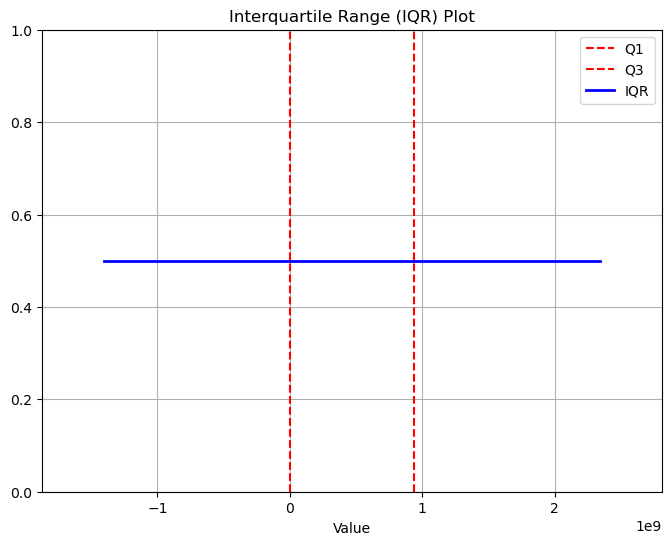

In [28]:
import matplotlib.pyplot as plt

# Sample data
data = df['domestic_gross']


# Calculate quartiles
Q1 = min(data)
Q3 = max(data)
IQR = Q3 - Q1

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot([Q1, Q1], [0, 1], 'r--', label='Q1')
plt.plot([Q3, Q3], [0, 1], 'r--', label='Q3')
plt.plot([Q1 - 1.5*IQR, Q3 + 1.5*IQR], [0.5, 0.5], 'b-', label='IQR', linewidth=2)
plt.xlim(Q1 - 2*IQR, Q3 + 2*IQR)
plt.ylim(0, 1)
plt.xlabel('Value')
plt.title('Interquartile Range (IQR) Plot')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
import pandas as pd
import sqlite3
conn =sqlite3.connect('im.db')
query = "SELECT name FROM sqlite_master WHERE type='table';"
table_names = pd.read_sql(query, conn)
print(table_names)


            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [30]:
type(table_names)

pandas.core.frame.DataFrame

In [31]:
pd.read_sql("SELECT * FROM directors ;", conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [32]:
pd.read_sql("SELECT * FROM movie_basics ;", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [33]:
pd.read_sql("SELECT * FROM known_for ;", conn)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [59]:
pd.read_sql("SELECT * FROM movie_akas;", conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [62]:
       
sql_query = """
            SELECT region, COUNT(*) AS num_movies
            FROM movie_akas
            GROUP BY region
            ORDER BY num_movies DESC
            LIMIT 10;
            """

# Execute the SQL query and read the result into a DataFrame
df_movies_by_region = pd.read_sql(sql_query, conn)

# Display the resulting DataFrame
print(df_movies_by_region)


  region  num_movies
0   None       53293
1     US       51490
2    XWW       18467
3     RU       13817
4     DE       11634
5     FR       10990
6     ES        9007
7     GB        8942
8     CA        8871
9     PL        8691


US is highest in rank for the movies watched.

In [53]:
pd.read_sql("SELECT * FROM movie_ratings;", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [54]:
 sql_query= """
            SELECT * 
            FROM movie_ratings
            WHERE averagerating > 9.90;
             
            """

# Execute the SQL query and read the results into a DataFrame
df = pd.read_sql(sql_query, conn)

# Display the DataFrame
print(df)

      movie_id  averagerating  numvotes
0    tt5390098           10.0         5
1    tt6295832           10.0         5
2    tt1770682           10.0         5
3    tt2632430           10.0         5
4    tt8730716           10.0         5
5    tt4960818           10.0         8
6    tt6991826           10.0         5
7   tt10176328           10.0         5
8    tt4944240           10.0         5
9    tt5089804           10.0         7
10   tt7259300           10.0         6
11  tt10378660           10.0         5
12   tt5344358           10.0         6
13   tt4109192           10.0         6
14   tt7227500           10.0         6
15   tt9715646           10.0        20


In [36]:
pd.read_sql("SELECT * FROM persons;", conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [37]:
pd.read_sql("SELECT * FROM  principals;", conn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [38]:
pd.read_sql("SELECT * FROM writers ;", conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [58]:
pd.read_sql(
    " SELECT *FROM writers WHERE movie_id =  tt9715646   ;" , conn)

DatabaseError: Execution failed on sql ' SELECT *FROM writers WHERE movie_id =  tt9715646   ;': no such column: tt9715646